## Odds and Ends: File Reading and Matplotlib

Now that we're familiar with the essentials of the Python language we're going to practice [reading files](https://www.pythonlikeyoumeanit.com/Module5_OddsAndEnds/WorkingWithFiles.html) and [plotting with Matplotlib](https://www.pythonlikeyoumeanit.com/Module5_OddsAndEnds/Matplotlib.html). 

Although these topics may be considered "odds and ends", they are common in many day-to-day applications. You'll find that spending some time up front to become familiar with these materials will save a lot of time down the road.

## Problem 1: Reading and Parsing Files
Let's pretend we were conducting a survey of favorite foods. Each participant is asked to list their favorite foods along with its category (e.g. dessert, snack, fruit). The food and category are separated by a colon, and each food-category pair is separated by a comma like so

```food: category, food: category, food: category, ... ```

The results of this survey are stored in a text file, `results.txt`, giving us a great opportunity to practice our file reading skills!

Our task is to write a function called `get_most_popular_foods` that takes a file path of survey results and returns the most common response for each food category in the form of a dictionary where the keys are the food categories and the values are the most common food of that type. If there is a tie, return the food that comes first alphabetically. Note, we don't know which food categories will be given before reading the file.

So, if we had data in the file `example.txt` with the contents below

``` granola bars: snack, shrimp: seafood
granola bars: snack
tuna: seafood ```

Our function would produce the following result
 ``` python
 >>> get_most_popular_foods('example.txt')
  {'snack': 'granola bars', 'seafood': ' shrimp'}
 ```
 
 The `collections.Counter` object will be useful for this problem. Also, the function `itertools.chain` may come in handy.
 
For reference, there is a short example input under `resources/example-survey.txt`. On this input, your function should produce the response as follows
 ``` python
>>> get_most_popular_foods('resources/example-survey.txt')
 {'dessert': 'cake', 'vegetable': 'carrots', 'fruit': 'peaches'}
```

In [310]:
def get_most_popular_foods(file_path):
    """ Read in survey and determine the most common food of each type.
    
    Parameters
    ----------
    file_path : str
        Path to text file containing favorite food survey responses.
        
    Returns
    -------
    Dict[str, str]
        Dictionary with the key being food type and value being food.
    """
#     with open(file_path, mode='r') as survey:   # opens file in reading mode
#         surv_list = ", ".join(survey.read().splitlines())      # reads every line as elements in a list, wihtout \n, and joins them separated by ", "
    
#     surv_list = (surv_list).split(", ") # splits the string surv_list into elements delimited by ", ". 
#                                         # This join and split is done to avoid having 2 or more entries in one element 
#                                         # (as would happen if they were on one line)
#                                         # the format is now ['food: category', 'food: category', ...]
        
#     survey_dict = {}                             
#     for key_val_pair in surv_list:               # creates a dictionary of food categories mapped to favorites and corresponding occurances
#         val, key = key_val_pair.split(": ")
        
#         if key in survey_dict:                   # checks if key is in the dictionary
#             if val in survey_dict[key]:          # checks if the value (the key in the inner dictionary) exists
#                 survey_dict[key][val] += 1       # if so, adds one to the occurance count
#             else:
#                 survey_dict[key][val] = 1        # if not, sets a new key to have the value of 1
#         else:
#              survey_dict[key] = {val: 1}         # if the key does not exist, create it 
#                                                  # format is now {'category': {'food': repetitions, 'food': repetitions...}, 'category': {'food': repetitions...}, ...}
    
#     final_solution = {}                          # define the solution dictionary
    
#     for category in survey_dict:                 # loops through every category
#         survey_dict[category] = dict(sorted(survey_dict[category].items(), reverse=True)) # orders every (key, value) pair in reverse alphabetical order, 
#                                                                                           # and inputs them into the dictionary again.
#         max_val = max(survey_dict[category].values())        # finds the maximum value of repetitions
        
#         for elem in survey_dict[category]:                   # loops through every food and if it has the same number of repetitions as the max_val, 
#             if survey_dict[category][elem] == max_val:       # inputs it into the final solution. since the dict is ordered in reverse alphabetical order, 
#                 final_solution[category] = elem              # the last inputted element of a category will be the first alphabetically,  
#                                                              # overriding the previous value.
                
#     return final_solution


    with open(file_path, mode='r') as survey: surv_list = ", ".join(survey.read().splitlines()).split(", ")
    
    survey_dict = {}                             
    for key_val_pair in surv_list:
        val, key = key_val_pair.split(": ")
        
        if key not in survey_dict: survey_dict[key] = {val: 0}    
        survey_dict[key][val] = (survey_dict[key][val] + 1 if val in survey_dict[key] else 1)
    
    final_solution = {}
    for category in survey_dict:
        survey_dict[category] = dict(sorted(survey_dict[category].items()))
        max_val = max(survey_dict[category].values())
            
        final_solution[category] = [elem for elem in survey_dict[category] if survey_dict[category][elem] == max_val][0]
    return final_solution

In [311]:
from bwsi_grader.python.odds_and_ends import grade_file_parser
grade_file_parser(get_most_popular_foods)


============================== ALL TESTS PASSED! ===============================
Your submission code: bwb8b7694e6fad3035e4331f2d41fa9477ec007cc11e40a8338b9390b5



## Problem 2: Plotting an Image with Matplotlib

We have an image in the file `resources/mystery-img.npy`. Read and plot the image, then answer the following for Question 2 of the homework:

__What is in this image?__

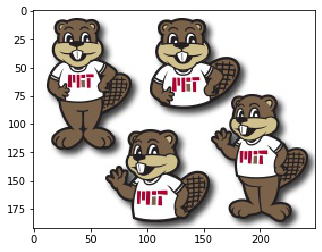

In [29]:
import numpy as np
import matplotlib.pyplot as plt
image = np.load('resources/mystery-img.npy')
plt.imshow(image)
    